# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
# loading Data
df = pd.read_csv("dataset3.csv", delimiter=";")

In [5]:
# Display the first few rows of the dataset
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

# Statistical Summary 

In [7]:
print(df.describe())

              age    polyuria  polydipsia  sudden_weight_loss    weakness  \
count  520.000000  520.000000  520.000000          520.000000  520.000000   
mean    48.028846    0.496154    0.448077            0.417308    0.586538   
std     12.151466    0.500467    0.497776            0.493589    0.492928   
min     16.000000    0.000000    0.000000            0.000000    0.000000   
25%     39.000000    0.000000    0.000000            0.000000    0.000000   
50%     47.500000    0.000000    0.000000            0.000000    1.000000   
75%     57.000000    1.000000    1.000000            1.000000    1.000000   
max     90.000000    1.000000    1.000000            1.000000    1.000000   

       polyphagia  genital_thrush  visual_blurring     itching  irritability  \
count  520.000000      520.000000       520.000000  520.000000    520.000000   
mean     0.455769        0.223077         0.448077    0.486538      0.242308   
std      0.498519        0.416710         0.497776    0.500300    

In [8]:
print(df['class'].value_counts())

class
1    320
0    200
Name: count, dtype: int64


In [9]:
df.isnull().any()

age                   False
gender                False
polyuria              False
polydipsia            False
sudden_weight_loss    False
weakness              False
polyphagia            False
genital_thrush        False
visual_blurring       False
itching               False
irritability          False
delayed_healing       False
partial_paresis       False
muscle_stiffness      False
alopecia              False
obesity               False
class                 False
dtype: bool

# Bivariate Analysis
This section examines relationships between the target variable and individual features

#  *Gender Distribution*

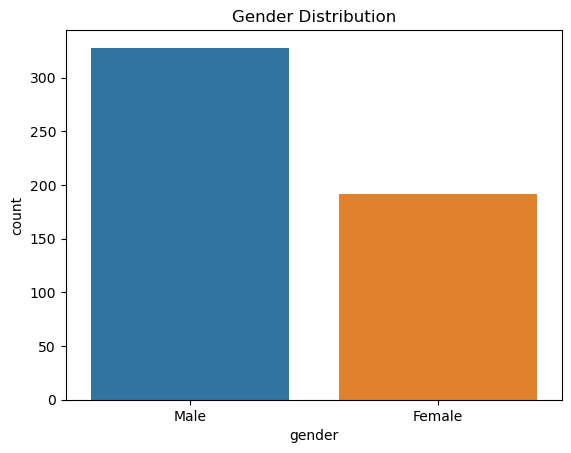

In [7]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


# Age Distribution Histogram

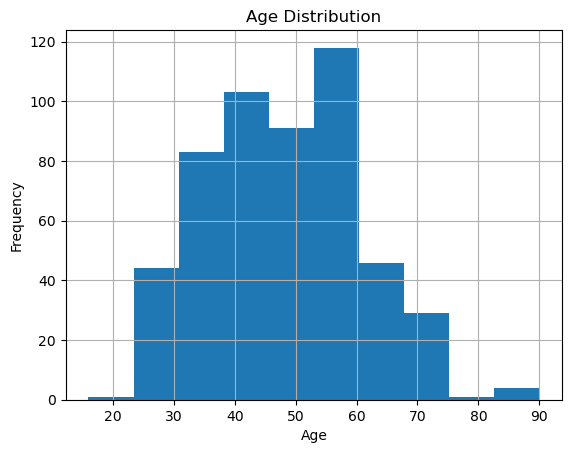

In [8]:

df['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


# Boxplot of Age Distribution by Diabetes Class

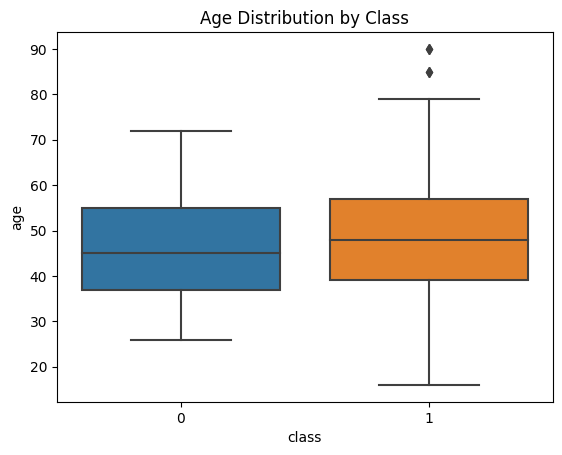

In [14]:
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Class')
plt.show()


# II. Age Distribution by Diabetes Classification

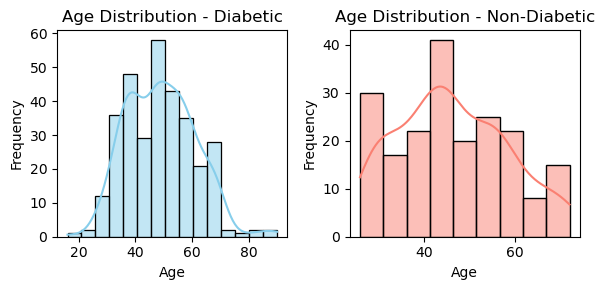

In [10]:
# Age distribution by diabetes classification
diabetic_data = df[df['class'] == 1]
non_diabetic_data = df[df['class'] == 0]

plt.figure(figsize=(6, 3))

# Diabetic individuals
plt.subplot(1, 2, 1)
sns.histplot(diabetic_data['age'], kde=True, color='skyblue')
plt.title("Age Distribution - Diabetic")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Non-diabetic individuals
plt.subplot(1, 2, 2)
sns.histplot(non_diabetic_data['age'], kde=True, color='salmon')
plt.title("Age Distribution - Non-Diabetic")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Age Distribution in Diabetic and Non-Diabetic Groups:** The majority of diabetic cases occur between the ages of 40 and 70, indicating a higher prevalence among middle-aged and older adults.

**Normal Distribution for Diabetics:** The age distribution of diabetics follows a bell-shaped curve, suggesting a concentration of cases in older age groups.

**Non-Diabetic Age Spread:** Non-diabetic cases are more widely distributed across various ages, with noticeable peaks around ages 30, 50, and 60.

**Age as a Risk Factor:** Age seems to be a significant factor in diabetes risk, with older individuals showing a higher likelihood of being diabetic.

**Insight for Modeling:** Age appears to be a crucial predictor of diabetes, given the distinct age distributions observed in diabetic and non-diabetic individuals.

# Multivariate Analysis

# Heatmap of Correlation Matrix for Numeric Features

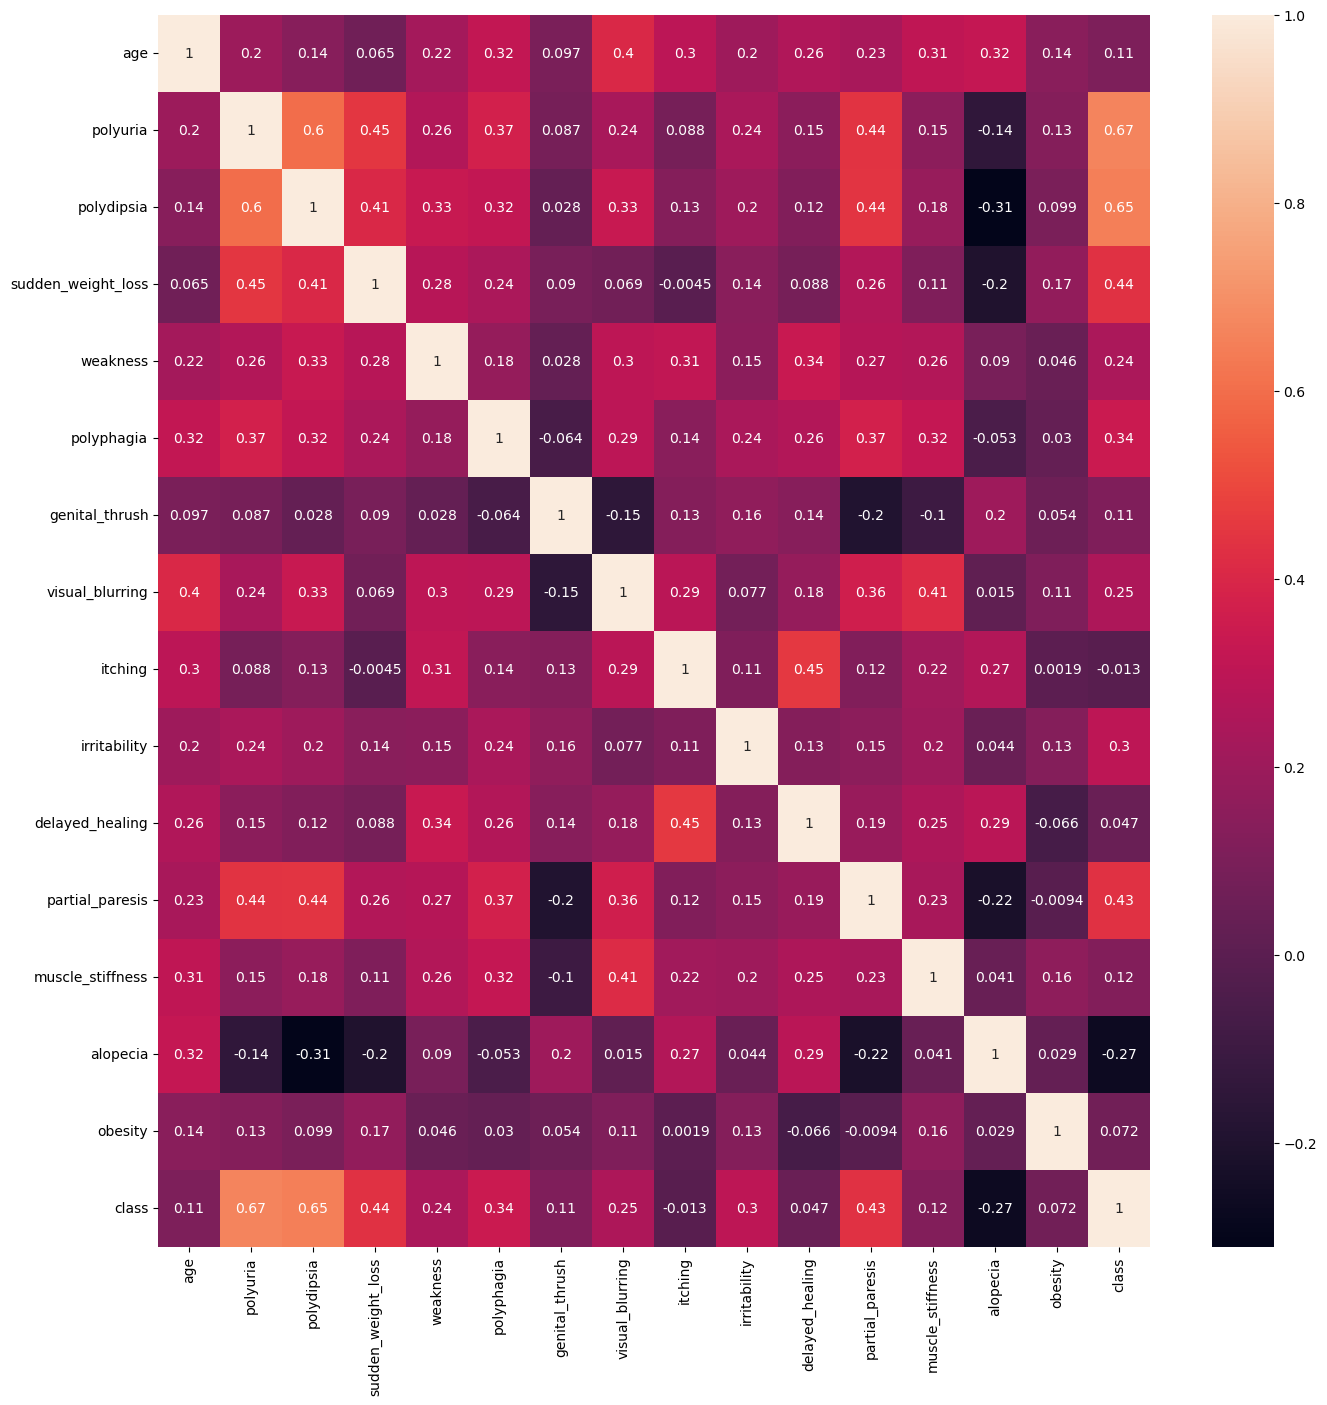

In [11]:
# Filter for numeric columns only
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# Calculate the correlation matrix for numeric data
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Polyuria Distribution by Diabetes Class

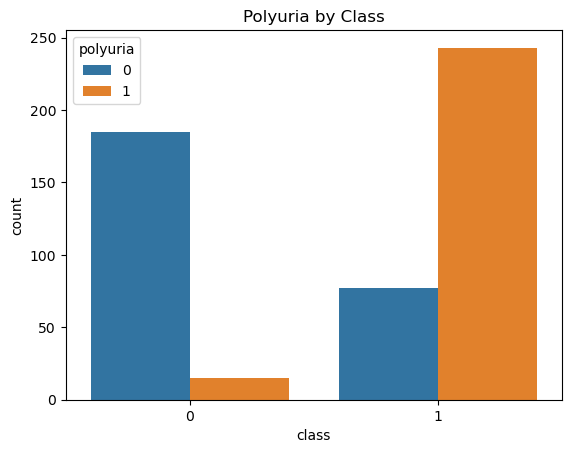

In [12]:

sns.countplot(x='class', hue='polyuria', data=df)
plt.title('Polyuria by Class')
plt.show()


# Diabetes Class Distribution Across Age Groups

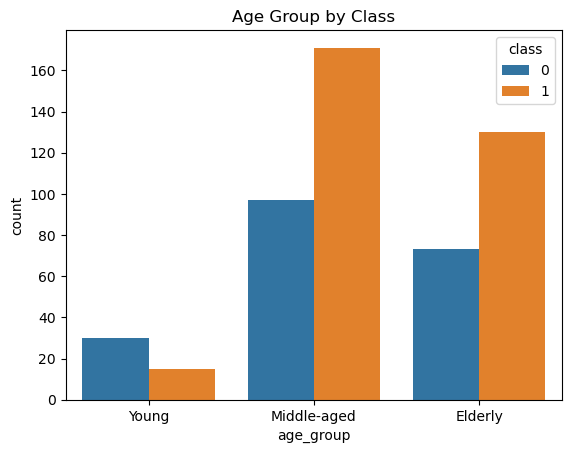

In [13]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 80], labels=['Young', 'Middle-aged', 'Elderly'])
sns.countplot(x='age_group', hue='class', data=df)
plt.title('Age Group by Class')
plt.show()


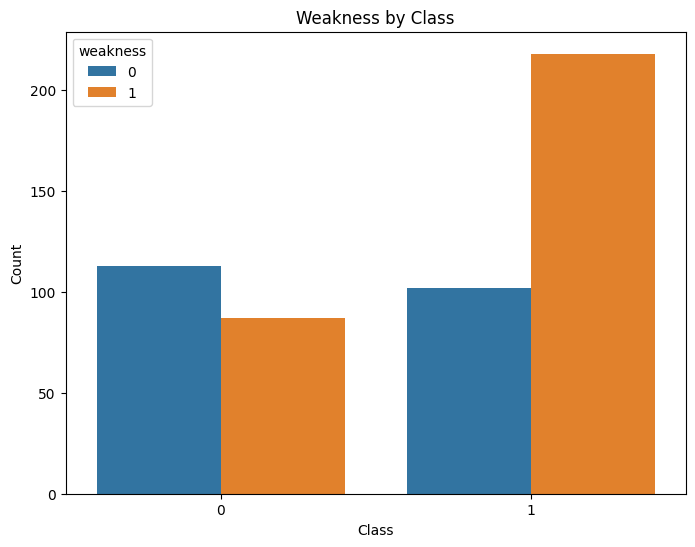

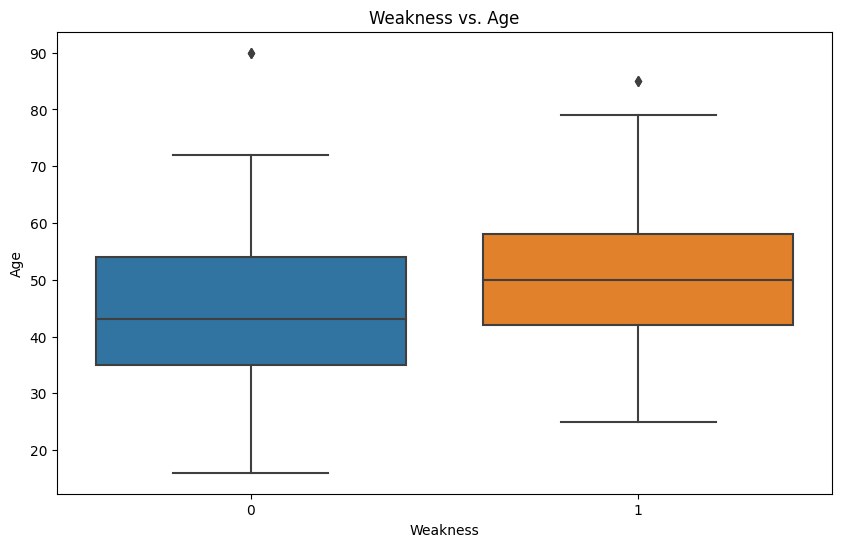

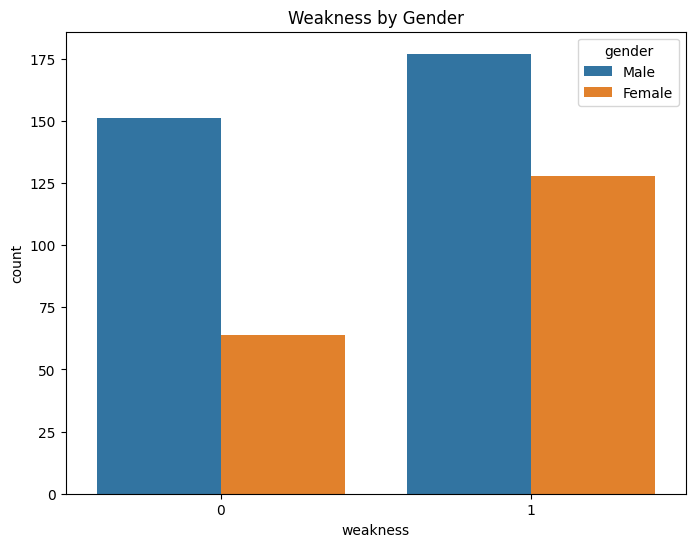

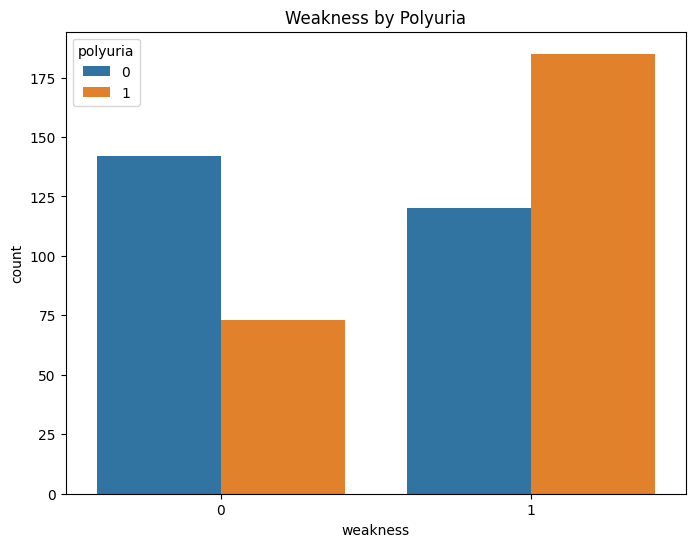

In [19]:

plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='weakness', data=df)
plt.title('Weakness by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='weakness', y='age', data=df) # or sns.violinplot
plt.title('Weakness vs. Age')
plt.xlabel('Weakness')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='weakness', hue='gender', data=df)
plt.title('Weakness by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='weakness', hue='polyuria', data=df)
plt.title('Weakness by Polyuria')
plt.show()

# Subset of Diabetic (Positive) Class 
This code filters the dataset to display only the rows where the 'class' is 'Positive', representing individuals who are diabetic.

In [20]:
df[df['class'] == 'Positive']

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group


# Obesity Distribution by Diabetes Class

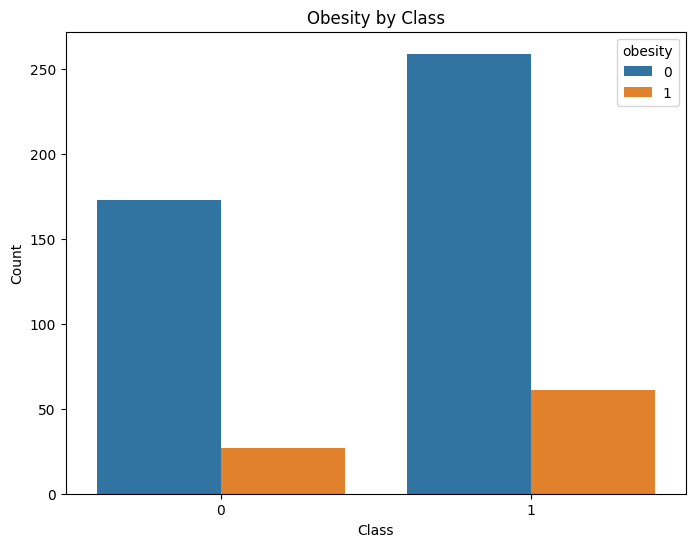

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='obesity', data=df)
plt.title('Obesity by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

This countplot shows how obesity is distributed across diabetic and non-diabetic individuals, highlighting the prevalence of obesity in each class.

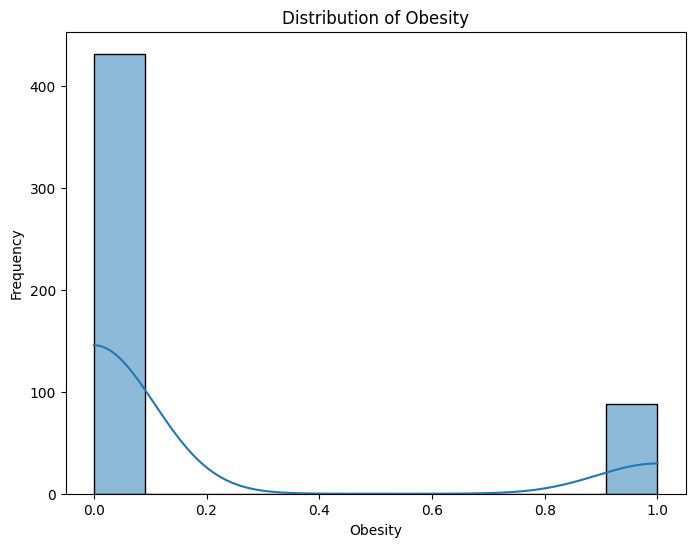

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['obesity'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Obesity')
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.show()

# Correlation of Obesity with Other Numerical Features

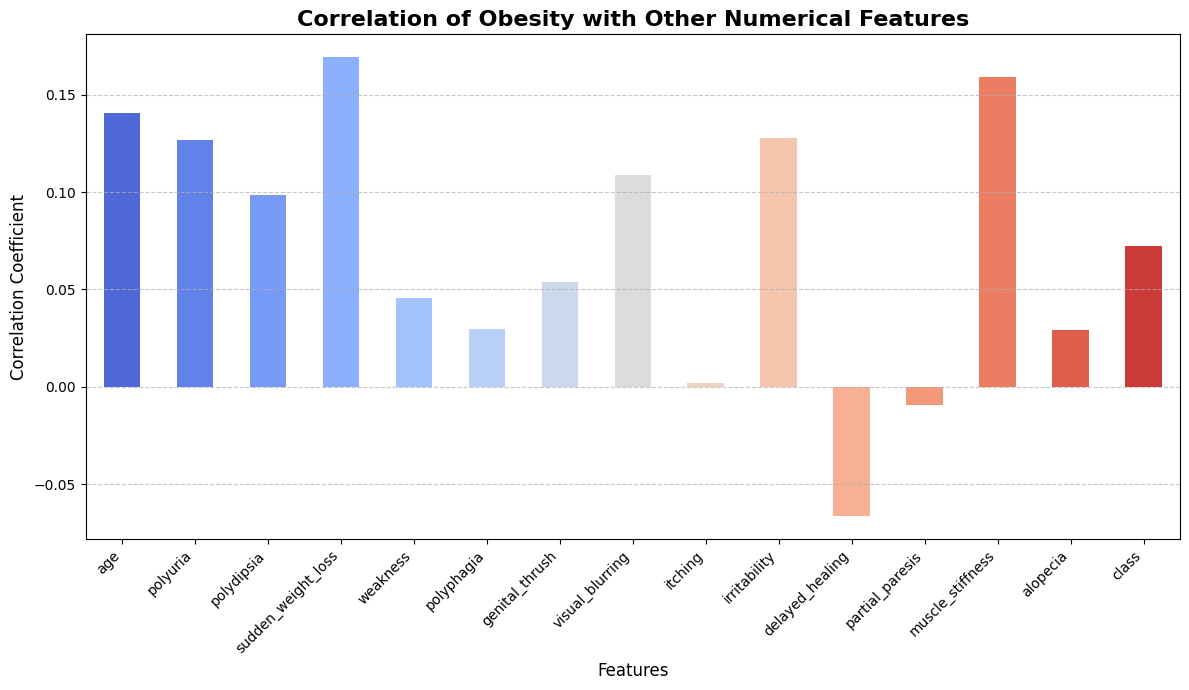

In [24]:

# Selecting numerical features
numerical_features = df.select_dtypes(include=np.number).columns
obesity_correlations = df[numerical_features].corr()['obesity'].drop('obesity')

# Setting figure size and colors
plt.figure(figsize=(12, 7))
colors = sns.color_palette("coolwarm", len(obesity_correlations))

# Plotting the bar plot with color gradient
obesity_correlations.plot(kind='bar', color=colors)
plt.title('Correlation of Obesity with Other Numerical Features', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


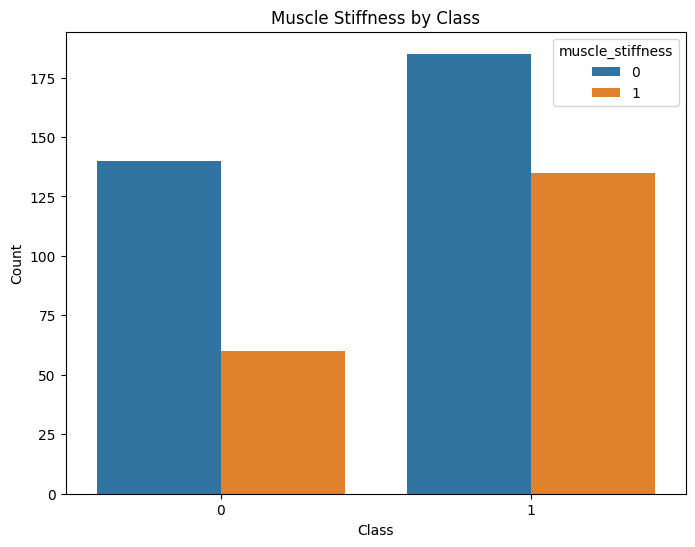

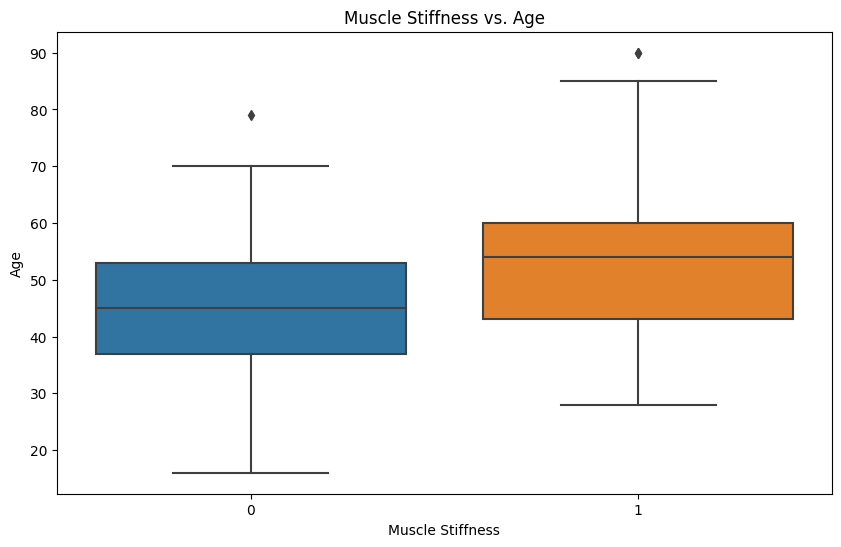

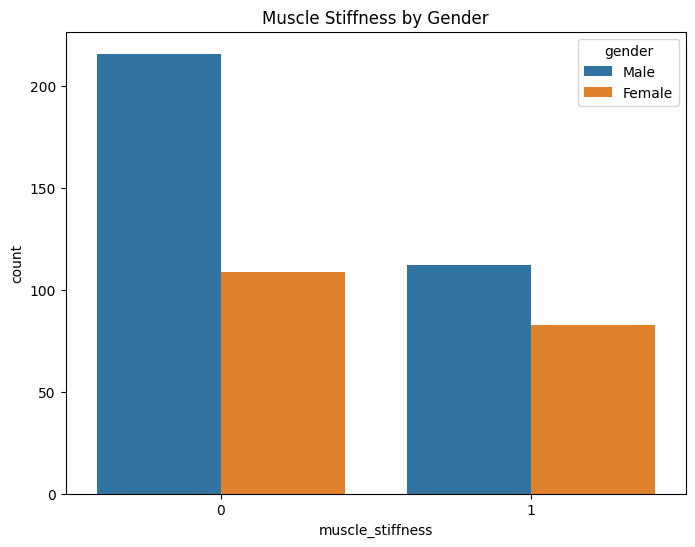

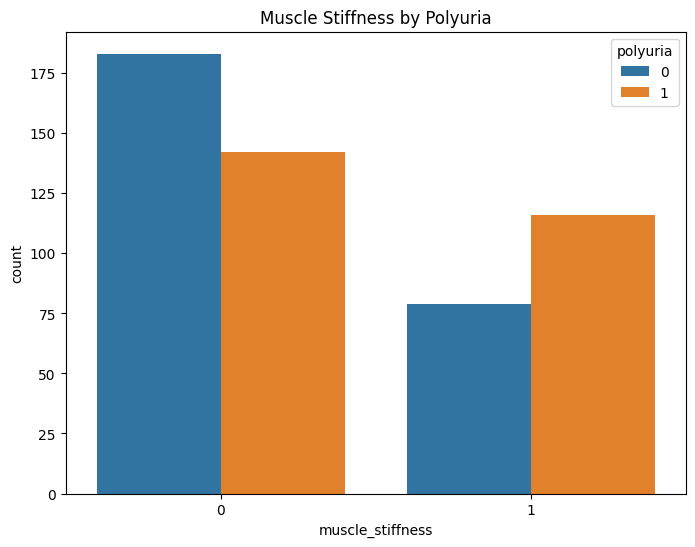

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='muscle_stiffness', data=df)
plt.title('Muscle Stiffness by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='muscle_stiffness', y='age', data=df) # or sns.violinplot
plt.title('Muscle Stiffness vs. Age')
plt.xlabel('Muscle Stiffness')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='muscle_stiffness', hue='gender', data=df)
plt.title('Muscle Stiffness by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='muscle_stiffness', hue='polyuria', data=df)
plt.title('Muscle Stiffness by Polyuria')
plt.show()

# Dimension Reduction and Feature Selection

In [14]:


# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['class'] = label_encoder.fit_transform(df['class'])  # Assuming "class" is categorical

# Drop non-numeric columns before scaling
X = df.drop(['class', 'age_group'], axis=1)  # Drop 'age_group' or any other non-numeric column
y = df['class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled successfully!")


Features scaled successfully!


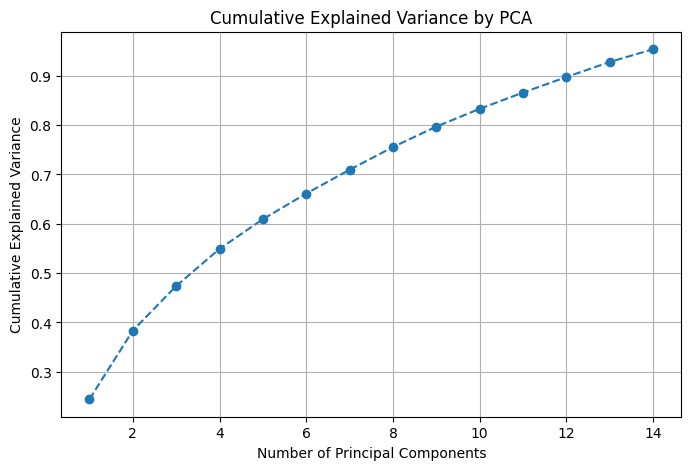

PCA reduced dimensions: 14


In [27]:

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

print(f"PCA reduced dimensions: {X_pca.shape[1]}")


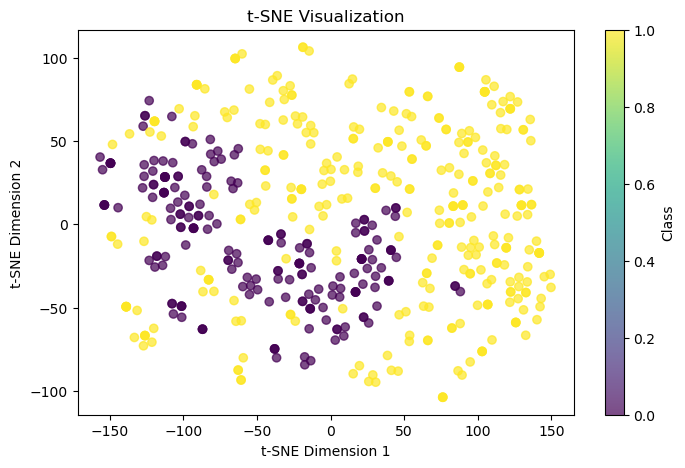

In [15]:
#from sklearn.manifold import TSNE

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE result
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Class')
plt.show()


 # Feature Selection

a) Recursive Feature Elimination (RFE)

In [29]:
# importing important libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Perform RFE with Random Forest
rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X_scaled, y)

# Select important features
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", selected_features)
X_rfe = X_scaled[:, rfe.support_]


Selected features by RFE: Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'alopecia'],
      dtype='object')


b) LASSO for Feature Selection

In [30]:
#imporing important libraries
from sklearn.linear_model import Lasso

# Apply LASSO
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)

# Select non-zero coefficients
lasso_features = X.columns[lasso.coef_ != 0]
print("Selected features by LASSO:", lasso_features)
X_lasso = X_scaled[:, lasso.coef_ != 0]


Selected features by LASSO: Index(['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia',
       'genital_thrush', 'visual_blurring', 'itching', 'irritability',
       'delayed_healing', 'partial_paresis', 'obesity'],
      dtype='object')


# Classification Models

In [31]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)


**Decision tree**

In [33]:
# importing libraries for Classification models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9461538461538461
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        46
           1       0.98      0.94      0.96        84

    accuracy                           0.95       130
   macro avg       0.94      0.95      0.94       130
weighted avg       0.95      0.95      0.95       130



**Logistic Regression**

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9307692307692308
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.94      0.95      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130



**Support Vector Machines (SVM)**

In [36]:
# Support Vector Machines (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9307692307692308
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.94      0.95      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130



**Random Forest**

In [37]:

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9692307692307692
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.99      0.96      0.98        84

    accuracy                           0.97       130
   macro avg       0.96      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130



# Hyperparameter tuning for all models

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from tabulate import tabulate

# Define hyperparameter grids for each model
param_grids = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "SVM": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5]
        }
    }
}

# Store results
tuned_results = []

# Perform hyperparameter tuning for each model
for name, config in param_grids.items():
    print(f"Hyperparameter tuning for {name}...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Best model and evaluation
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    
    tuned_results.append({
        "Model": name,
        "Best Parameters": grid.best_params_,
        "Accuracy": accuracy,
        "Precision": classification_rep['weighted avg']['precision'],
        "Recall": classification_rep['weighted avg']['recall'],
        "F1-Score": classification_rep['weighted avg']['f1-score']
    })



Hyperparameter tuning for Decision Tree...
Hyperparameter tuning for Logistic Regression...
Hyperparameter tuning for SVM...
Hyperparameter tuning for Random Forest...


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    
}

# Results dictionary to store metrics
results = []

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    })
import pandas as pd

summary = []
for res in results:
    summary.append({
        "Model": res["Model"],
        "Accuracy": res["Accuracy"],
        "Precision": res["Classification Report"]['weighted avg']['precision'],
        "Recall": res["Classification Report"]['weighted avg']['recall'],
        "F1-Score": res["Classification Report"]['weighted avg']['f1-score']
    })
df_summary = pd.DataFrame(summary)
print(df_summary)

                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.946154   0.947939  0.946154  0.946515
1  Logistic Regression  0.930769   0.930538  0.930769  0.930594
2                  SVM  0.930769   0.930538  0.930769  0.930594
3        Random Forest  0.969231   0.970005  0.969231  0.969373


In [47]:
from tabulate import tabulate

for row in summary:
    row["Accuracy"] = round(row["Accuracy"] * 100, 2)
    row["Precision"] = round(row["Precision"] * 100, 2)
    row["Recall"] = round(row["Recall"] * 100, 2)
    row["F1-Score"] = round(row["F1-Score"] * 100, 2)

table = tabulate(summary, headers="keys", tablefmt="fancy_grid", numalign="center", stralign="center")
print(table)


╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│        Model        │  Accuracy  │  Precision  │  Recall  │  F1-Score  │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│    Decision Tree    │    9462    │    9479     │   9462   │    9465    │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression │    9308    │    9305     │   9308   │    9306    │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│         SVM         │    9308    │    9305     │   9308   │    9306    │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│    Random Forest    │    9692    │    9700     │   9692   │    9694    │
╘═════════════════════╧════════════╧═════════════╧══════════╧════════════╛


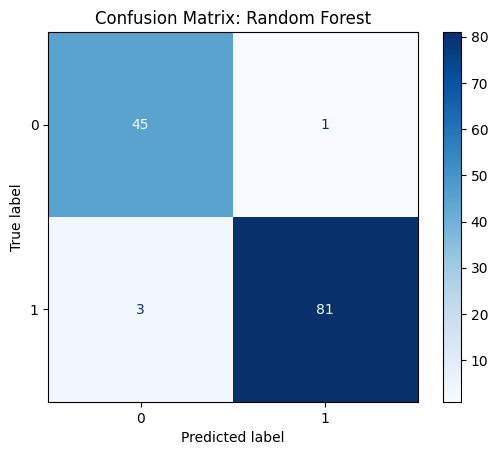

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix: Random Forest")
plt.show()


# Comparison of Results

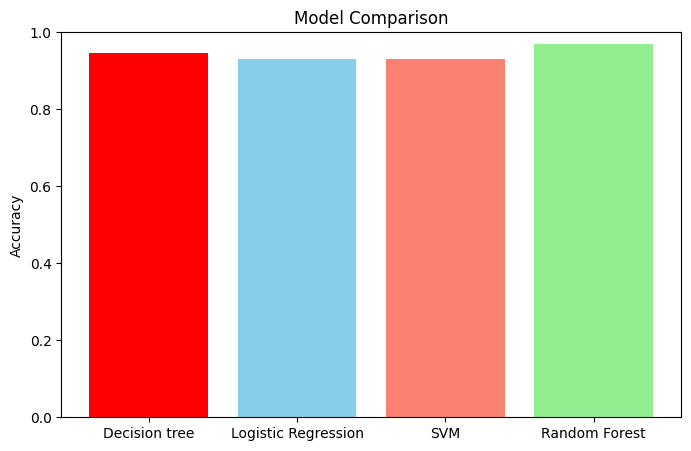

In [49]:
# Comparison of accuracies
models = ['Decision tree','Logistic Regression', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]

# Plot comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['red','skyblue', 'salmon', 'lightgreen'])
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


### Conclusion of Model Comparison

Based on the performance metrics across four classification models, the **Random Forest** model emerges as the most effective for this dataset. Here is a summary of the findings:

1. **Random Forest** achieved the highest accuracy (96.92%) and F1-Score (96.94%), indicating its superior ability to correctly classify both positive and negative instances. Its precision (97%) suggests it makes fewer false positive predictions compared to others.

2. **Decision Tree** performed well with an accuracy of 94.62% and an F1-Score of 94.65%. While it is simpler and faster, it is slightly less robust than Random Forest, which benefits from ensemble learning.

3. **Logistic Regression** and **SVM** delivered identical performances, achieving an accuracy and F1-Score of 93.08% and 93.06%, respectively. These models are effective but may not capture complex patterns as effectively as ensemble-based approaches like Random Forest.

### Recommendation:
For this dataset, **Random Forest** is the preferred choice due to its higher accuracy, precision, recall, and F1-Score. Its ability to handle feature interactions and variability makes it ideal for this classification task. However, if simplicity or interpretability is a priority, the **Decision Tree** can be a good alternative.